In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np

In [6]:
new = pd.read_excel("C:\\Users\\UMANG PATEL\\Desktop\\AIMS\\product.xlsx")
old = pd.read_csv("C:\\Users\\UMANG PATEL\\Desktop\\AIMS\\Bill_Data.csv")
old_party = pd.read_csv("C:\\Users\\UMANG PATEL\\Desktop\\AIMS\\Party_Data.csv")
type(new)
new.head()


prodPurRate     71.637117
prodSalRate    100.587257
prodDiscAmt      0.167718
prodPTC         94.783030
dtype: float64

In [113]:
# new.loc[new.prodCategory=="PIZZA PASTA",'prodPurRate']
# new.prodCategory.nunique()
# new.prodPack.nunique()

In [3]:
(old.loc[old.BillProdName=="SABRAS MASALA PANIPURI",['BillProdCode']]).sample(10)
# new.groupby(['prodCategory']).prodPurRate.agg(['size','sum']).reset_index().sort_values(by='size')
# old.BillProdName.sample(10)
new

,prodName,prodCode,prodPack,prodCategory,prodDesc,prodPurRate,prodSalRate,prodCrPoints,prodDiscAmt,prodPTC
0,AADU,AAD01,KGS,Vegetable,NaN,85.00,100.0,N,0.0,88.0
1,AADU LEELU,AAD02,KG,Vegetable,NaN,70.00,100.0,N,0.0,48.0
2,AASHA METHI KHAKHRA,AAS01,PKD,SNACKS,NaN,110.25,140.0,N,0.0,NaN
3,AASHA MASALA KHAKHRA,AAS02,PKD,SNACKS,NaN,110.25,140.0,N,0.0,NaN
4,AASHA JIRA KHAKHRA,AAS03,PKD,SNACKS,NaN,55.00,70.0,N,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
837,YOGI CHANAJOR,YOG02,PKD,SNACKS,NaN,26.88,36.0,N,0.0,NaN
838,YOGI CHANADAL,YOG03,PKD,SNACKS,NaN,26.80,36.0,N,0.0,NaN
839,YOGI TOMATO SEV,YOG04,PKD,SNACKS,NaN,26.88,40.0,N,0.0,NaN
840,YOGI CHATPATA MUNG,YOG05,PKD,SNACKS,NaN,NaN,NaN,N,0.0,NaN


In [4]:
old_party.head()
new=new.rename(columns={"prodCode": "BillProdCode",'prodCategory':'ProdCategory','prodPurRate':'ProdPRate','prodSalRate':'ProdSRate'})
new = new.loc[:,['BillProdCode','ProdCategory','ProdPRate','ProdSRate']]

In [5]:
#billprodname of new not print and find all matches in old row in new col.......by default inner
#when two col differnt name then left_on(old column name) and right_on(new col name) on which we want to merge.
#left_index on then we have to right_on = col_name
df = pd.merge(old,new,how='left',left_on=None, right_on=None, left_index=False, right_index=False)    

In [6]:
df.isnull().sum()
df.sample(5,random_state=0)
df.BillProdName.nunique()

461

In [62]:
old.sample(5,random_state=0)
old.BillProdName.nunique()
# df.ProdCategory.value_counts()

461

In [7]:
category=df.ProdCategory.value_counts(normalize=True)*100
category.index
category.values/100

array([6.23773020e-01, 1.91221838e-01, 1.00331869e-01, 3.29531644e-02,
       2.56614004e-02, 1.65466953e-02, 4.18341591e-03, 1.77619893e-03,
       1.75282790e-03, 1.02832570e-03, 4.67420772e-04, 2.57081425e-04,
       4.67420772e-05])

In [8]:
%matplotlib inline

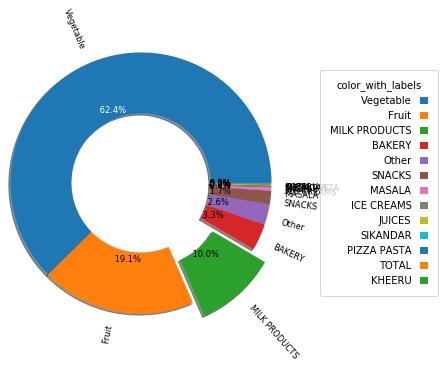

In [26]:
explode = [0,0,0.2,0,0,0,0,0,0,0,0,0,0]
patches,texts,autotext=plt.pie(category.values,labels=category.index,autopct='% 0.1f%%',textprops={'size':'smaller'},radius=1.5,explode=explode,shadow=True,rotatelabels=True,wedgeprops={'width':0.7})
plt.legend(loc='center left',bbox_to_anchor=(1.3, 0.5),fontsize=10,markerfirst = False,title='color_with_labels',borderpad=1,handlelength=0.8,handletextpad=0.9)

# Make percent texts even smaller
# plt.setp(autotext,size='x-small')
autotext[0].set_color('white')




In [13]:

df.head(5)

,BillNo,BillQty,BillParty,BillDate,BillProdNo,BillProdCode,BillProdName,BillProdPacking,BillProdBatch,BillAddTax,...,BillRate,BillVat,BillAmt,BillFree,BillPTS,BillPartyType,ProdCategory,ProdPRate,ProdSRate,Profit
0,E1617-75852,10.00,NaN,16-Jan-19,2,BAT01,BATAKA,NaN,NaN,0,...,14.0,0.0,140.0,0.0,NaN,R,Vegetable,12.000,18.0,6.000
1,E1617-75852,6.00,NaN,16-Jan-19,1,DUN01,DUNGRI,NaN,NaN,0,...,12.0,0.0,72.0,0.0,NaN,R,Vegetable,10.000,16.0,6.000
2,E1617-75853,3.00,HAREKRISHNA BAKERY,16-Jan-19,1,RIN07,RINGAN BHARTHA,NaN,NaN,0,...,38.0,0.0,114.0,0.0,NaN,R,Vegetable,35.000,52.0,17.000
3,E1617-75854,0.25,NaN,16-Jan-19,1,GAJ01,GAJAR,NaN,NaN,0,...,24.0,0.0,6.0,0.0,NaN,R,Vegetable,13.000,24.0,11.000
4,E1617-75855,3.00,NaN,16-Jan-19,1,BAN01,BANANA,NaN,NaN,0,...,3.4,0.0,10.2,0.0,NaN,R,Fruit,23.334,40.0,16.666


In [10]:
df['BillDate'] = pd.to_datetime(df.BillDate)
df.isnull().sum()

BillNo               0
BillQty              0
BillParty        25735
BillDate             0
BillProdNo           0
BillProdCode         1
BillProdName         4
BillAddTax           0
BillRate             0
BillVat              0
BillAmt              0
BillFree             0
BillPartyType        0
ProdCategory        34
ProdPRate           57
ProdSRate           44
dtype: int64

In [7]:
df.drop(columns=['BillExpdate','BillProdPacking','BillProdBatch','BillMRP','BillPTS'],inplace=True)

In [11]:
df['month']=df.BillDate.dt.month.astype(str).str.pad(width=2,fillchar="0")
df['year']=df.BillDate.dt.year.astype(str)
df['weekday'] = df.BillDate.dt.day_name()


In [16]:
df3=df.loc[(df.year=='2019') & (df.month=='03'),['BillParty','weekday']].copy()
# df3.groupby('weekday').BillParty.describe()
# df3

Text(0, 0.5, 'Total_no_of_customers')

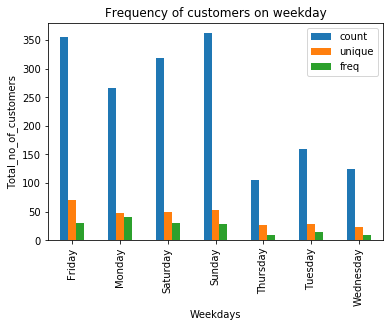

In [17]:
df3.groupby('weekday').BillParty.describe().plot(kind='bar',title='Frequency of customers on weekday')
plt.xlabel('Weekdays')
plt.ylabel('Total_no_of_customers')

In [81]:
#np.size means no of party on a particular date
df3=df.groupby(['BillDate','BillNo']).agg(np.size)['BillParty']
df3=df3.groupby('BillDate').agg(np.size)
df3.sort_values()

# df.ProdCategory.value_counts()
# df.sample(15)

BillDate
19-11-2018      2
08-11-2018      5
26-11-2018     24
12-Mar-19      29
18-12-2018     38
             ... 
06-11-2018    174
15-11-2018    177
03-Mar-19     177
04-11-2018    191
05-Mar-19     200
Name: BillParty, Length: 113, dtype: int64

In [19]:
df4=df.loc[df.ProdCategory =='MILK PRODUCTS',['BillQty','BillProdName']]
df4.BillProdName.value_counts()
df4.BillProdName.describe()

count     4293
unique      60
top       MILK
freq      2037
Name: BillProdName, dtype: object

Text(0.5, 0, 'Categories')

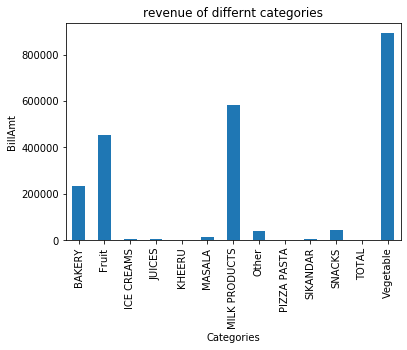

In [67]:
#category wise revenue of differnt categories
df.groupby('ProdCategory').BillAmt.sum().plot(kind='bar',title='revenue of differnt categories')
plt.ylabel('BillAmt')
plt.xlabel('Categories')
# df.groupby('ProdCategory').BillAmt.sum()


In [21]:
df.month.value_counts()
df.loc[(df.month=='01') & (df.year=='2019'),['BillProdName']]


,BillProdName
0,BATAKA
1,DUNGRI
2,RINGAN BHARTHA
3,GAJAR
4,BANANA
...,...
27989,FLOWER
27990,RINGAN VISNAGARI
27991,SAKKARIYA
27992,RINGAN LAMBA


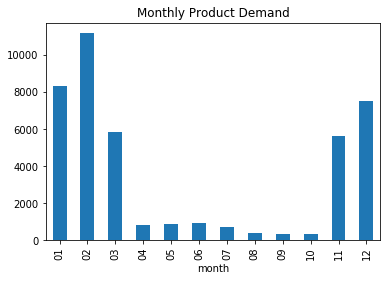

In [26]:
df5 = df.groupby(['month','ProdCategory']).agg(np.size)['BillProdName']
# print(df5.unstack())
df5.groupby('month').sum().plot(kind='bar',title='Monthly Product Demand')
# df5.groupby('month').describe() #----------01 month avg 755 products........

In [22]:
df5 = df.groupby(['month','ProdCategory']).agg(np.size)['BillProdName']
df5.groupby('month').sum().plot(kind='bar',title='Monthly Product Demand')

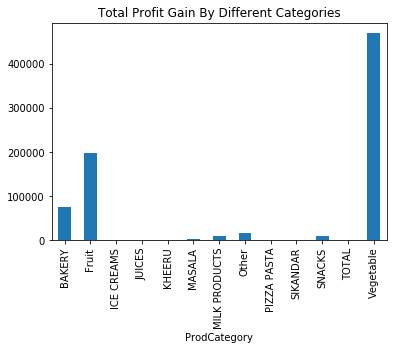

In [72]:
df['Profit'] = df['ProdSRate'] - df['ProdPRate']
df6 = df.groupby(['month','ProdCategory']).sum()['Profit'].unstack()
# df6.loc[:,'BAKERY':'Vegetable'].apply(max)   #another method............
df.groupby('ProdCategory').Profit.sum().plot(kind='bar',title='Total Profit Gain By Different Categories')

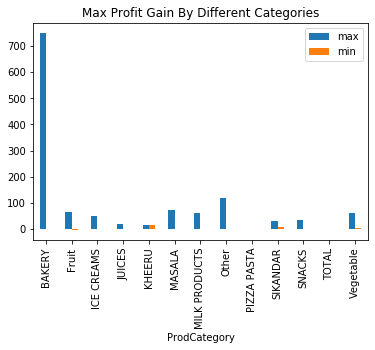

In [24]:
df['Profit'] = df['ProdSRate'] - df['ProdPRate']
df.groupby('ProdCategory').Profit.agg(['max','min']).plot(kind='bar',title='Max Profit Gain By Different Categories')

In [31]:
df.head()

,BillNo,BillQty,BillParty,BillDate,BillProdNo,BillProdCode,BillProdName,BillProdPacking,BillProdBatch,BillAddTax,...,BillFree,BillPTS,BillPartyType,ProdCategory,ProdPRate,ProdSRate,Profit,month,year,weekday
0,E1617-75852,10.00,NaN,2019-01-16,2,BAT01,BATAKA,NaN,NaN,0,...,0.0,NaN,R,Vegetable,12.000,18.0,6.000,01,2019,Wednesday
1,E1617-75852,6.00,NaN,2019-01-16,1,DUN01,DUNGRI,NaN,NaN,0,...,0.0,NaN,R,Vegetable,10.000,16.0,6.000,01,2019,Wednesday
2,E1617-75853,3.00,HAREKRISHNA BAKERY,2019-01-16,1,RIN07,RINGAN BHARTHA,NaN,NaN,0,...,0.0,NaN,R,Vegetable,35.000,52.0,17.000,01,2019,Wednesday
3,E1617-75854,0.25,NaN,2019-01-16,1,GAJ01,GAJAR,NaN,NaN,0,...,0.0,NaN,R,Vegetable,13.000,24.0,11.000,01,2019,Wednesday
4,E1617-75855,3.00,NaN,2019-01-16,1,BAN01,BANANA,NaN,NaN,0,...,0.0,NaN,R,Fruit,23.334,40.0,16.666,01,2019,Wednesday


In [35]:
df.ProdCategory.value_counts()
df.BillAmt.value_counts()

10.00      1930
20.00      1790
30.00      1151
15.00      1085
40.00       984
           ... 
72.38         1
41.55         1
2100.00       1
3.43          1
262.85        1
Name: BillAmt, Length: 5109, dtype: int64

Text(0, 0.5, 'Percentage Value')

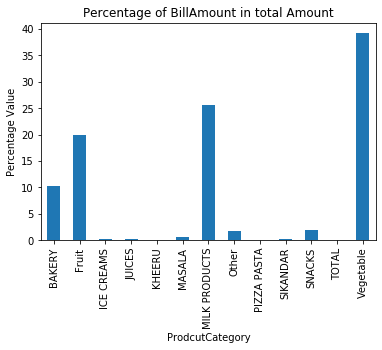

In [65]:
val=df.BillAmt.sum()
catego=(df.groupby('ProdCategory').BillAmt.sum()/val * 100)
catego.plot(kind='bar',title='Percentage of BillAmount in total Amount')
plt.xlabel('ProdcutCategory')
plt.ylabel('Percentage Value')

In [13]:
df = pd.read_csv('Combine_Data.csv',parse_dates=['BillDate'],encoding='UTF-8')